<a href="https://colab.research.google.com/github/daJarae/DataScience/blob/main/R_IDS_from7to11_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Data Science2

Data Visualization: Ch8-Ch11



전체 내용은 "Introduction to Data Science"의 커리큘럼을 따르며, 기초적인 일부는 생략합니다.

R 복습용으로 만든 포켓몬 종족값 데이터를 불러옵니다.

복습 코드를 학습하기 전에 도감 번호를 통해 '세대' 컬럼을 추가합니다. (9세대인 팔데아는 없음)

In [2]:
pkm=read.csv('/content/pkm_many_nan.csv')

포켓몬 지방도감 001번은 풀타입 스타팅 포켓몬입니다.

In [56]:
print(c(pkm$이름[1],pkm$번호[1])) #1 관동 시작번호
print(c(pkm$이름[208],pkm$번호[208]))  #2 성도
print(c(pkm$이름[318],pkm$번호[318])) #3 호연
print(c(pkm$이름[482],pkm$번호[482])) #4 신오
print(c(pkm$이름[601],pkm$번호[601])) #5 하나, 예외적으로 배포 포켓몬 비크티니는 하나도감 000번
print(c(pkm$이름[777],pkm$번호[777])) #6 칼로스 (XY)
print(c(pkm$이름[858],pkm$번호[858])) #7 알로라 (썬문)
print(c(pkm$이름[950],pkm$번호[950])) #8 가라르 (소드실드)

[1] "이상해씨" "001"     
[1] "치코리타" "152"     
[1] "나무지기" "252"     
[1] "모부기" "387"   
[1] "비크티니" "494"     
[1] "도치마론" "650"     
[1] "나몰빼미" "722"     
[1] "흥나숭" "810"   


In [59]:
세대=c(rep("1",207),rep("2",110),rep("3",482-318),rep("4",601-482),rep("5",777-601),rep("6",858-777),rep("7",950-858),rep("8",1045-950+1)) #마지막 번호는 동일지역이므로 +1
pkm$세대=세대 #길이가 다르면 error
head(pkm)

,X,번호,이름,체력,공격,방어,특공,특방,스피드,기타,⋯,벌레,불꽃,비행,악,얼음,에스퍼,전기,페어리,풀,세대
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,001,이상해씨,45,49,49,65,65,45,,⋯,0,0,0,0,0,0,0,0,0,1
2,1,002,이상해풀,60,62,63,80,80,60,,⋯,0,0,0,0,0,0,0,0,0,1
3,2,003,이상해꽃,80,82,83,100,100,80,,⋯,0,0,0,0,0,0,0,0,1,1
4,3,003m,메가이상해꽃,80,100,123,122,120,80,,⋯,0,0,0,0,0,0,0,0,0,1
5,4,004,파이리,39,52,43,60,50,65,,⋯,0,0,0,0,0,0,0,0,0,1
6,5,005,리자드,58,64,58,80,65,80,,⋯,0,0,0,0,0,0,0,0,0,1


In [203]:
pkm=pkm|>mutate(total=H+P+D+TP+TD+S)
mask=sapply(pkm$total, function(x){ifelse(x>=600,T,F)}) #종족값이 600 이상인 포켓몬이면 T
strong_dragon=pkm[mask,]|>filter(dragon==1&tmi=='')|>select(name,total,P,S,gen)



---



In [24]:
#install.packages('tidyverse') #최초 1회만 실행.
#dplyr, ggplot2 등 'tidy'한 data에 쓸 수 있는 여러 패키지 포함

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [202]:
library(tidyverse)

tibble은 data.frame보다 유연하기 때문에 mean, sd 같은 함수도 값처럼 저장할 수 있다.



---



#Ch8: ggplot2

In [192]:
library(dplyr)
library(ggplot2)

ggplot의 세가지 요소:

* data

* Geometry (plot 종류)

* Aesthetic mapping (x,y,color(hue))



ggplot2 cheat sheet

http://rafalab.dfci.harvard.edu/dsbook/R/img/ggplot2-cheatsheeta.png

http://rafalab.dfci.harvard.edu/dsbook/R/img/ggplot2-cheatsheetb.png

다음 데이터를 사용합니다.

In [204]:
strong=strong_dragon
head(strong)

,name,total,P,S,gen
,<chr>,<int>,<int>,<int>,<chr>
1,망나뇽,600,134,80,1
2,보만다,600,135,100,3
3,라티아스,600,80,110,3
4,라티오스,600,90,110,3
5,레쿠쟈,680,150,95,3
6,한카리아스,600,130,102,4


In [211]:
p=ggplot(data=strong_dragon) #can save
class(p)

[1] "gg"     "ggplot"

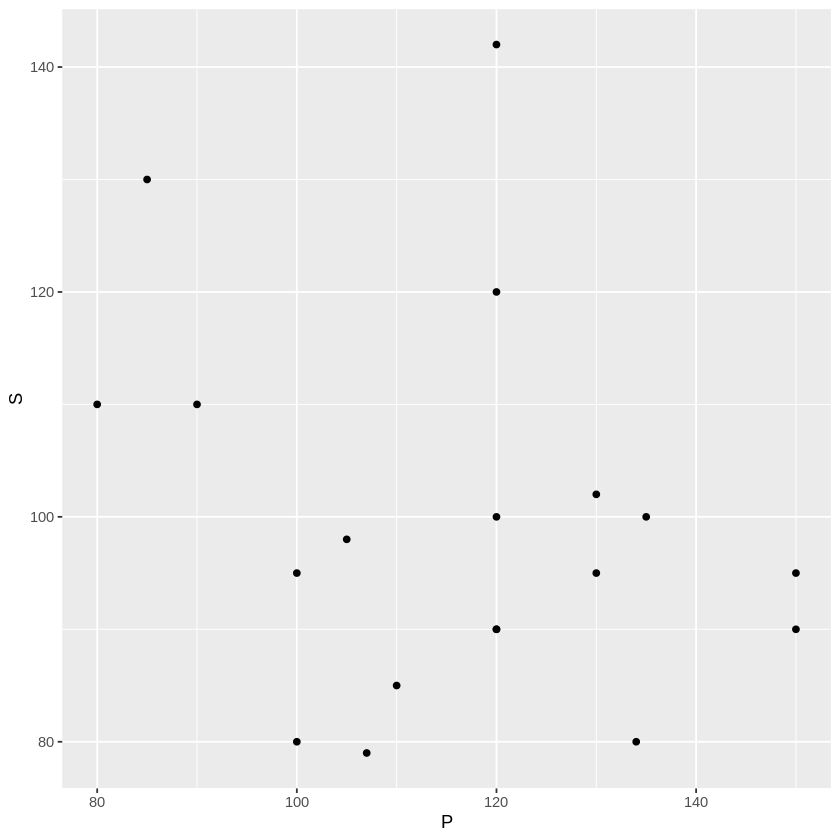

In [205]:
strong |> ggplot() + 
  geom_point(aes(x = P, y = S))

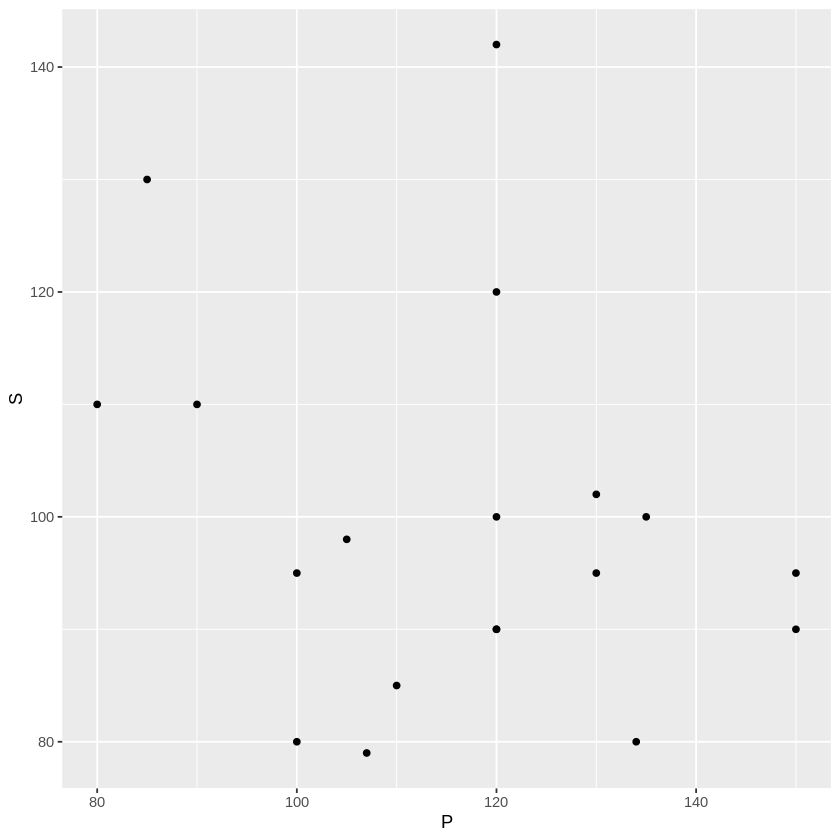

In [213]:
p+geom_point(aes(P,S)) #same

편리한 점은 label, scale이 자동으로 설정된다는 점입니다.

((x,y)를 전부 포함하는 적절한 x,y의 범위가 되도록)





label, size

 점 크기를 조정 (size는 geom_~()내 aes 밖에서 선언!)
 
 세대 번호를 점 위 label로서 추가(label은 geom_text() 내 aes 안에서 선언!)


점마다 df내 관계를 참조해야 하는 경우 mapping이 필요하므로 aes 안에 적용

(반면 size 설정은 일괄 적용이고, geom_point의 구성 요소여야함)

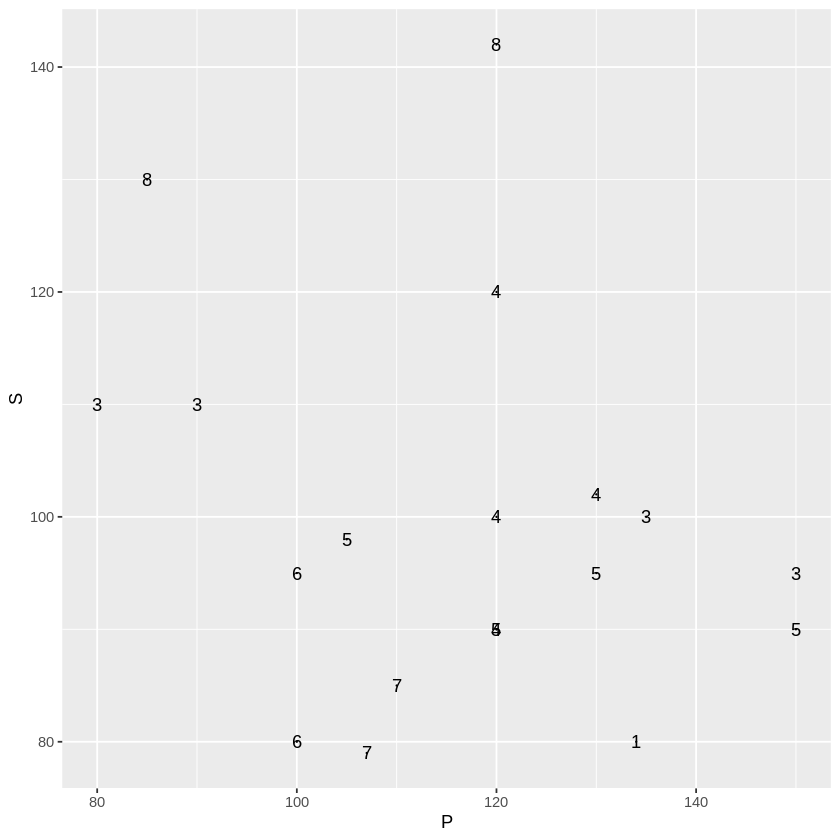

In [218]:
p+geom_point(aes(P,S),size=0.001)+geom_text(aes(P,S,label=gen))

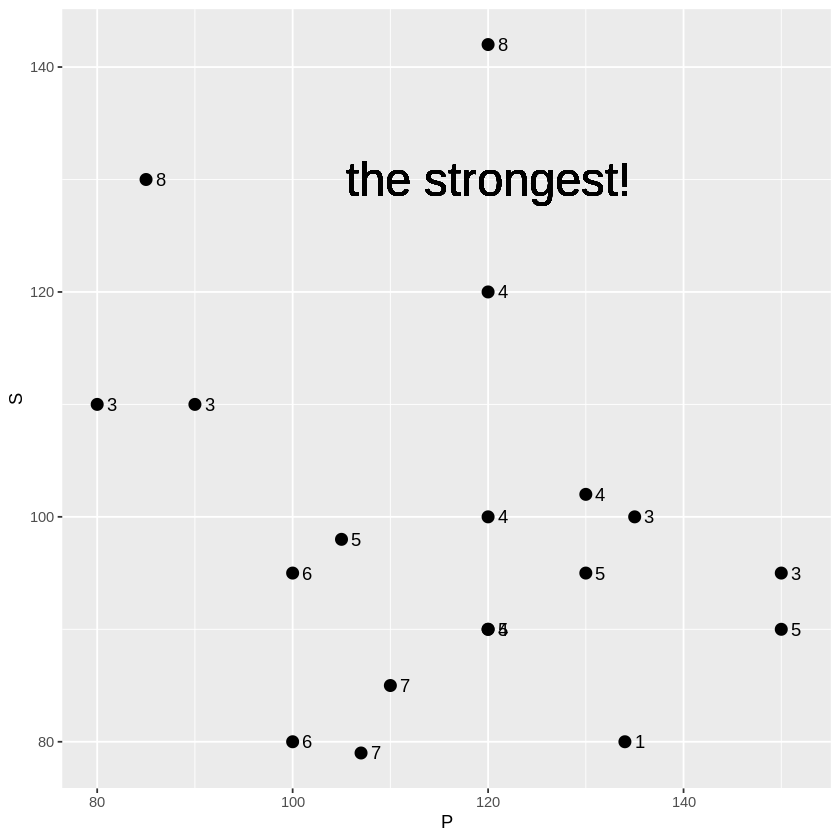

In [226]:
p2=strong|>ggplot(aes(P,S,label=gen))

p2+geom_point(size=3)+
  geom_text(nudge_x=1.5)+ #nudge식 슬쩍 옮기기.
  geom_text(aes(x=120,y=130,label="the strongest!"),size=10) #글자size

로그 스케일링 적용: 원인을 모르겠으나 잘못된 것 같읍니다

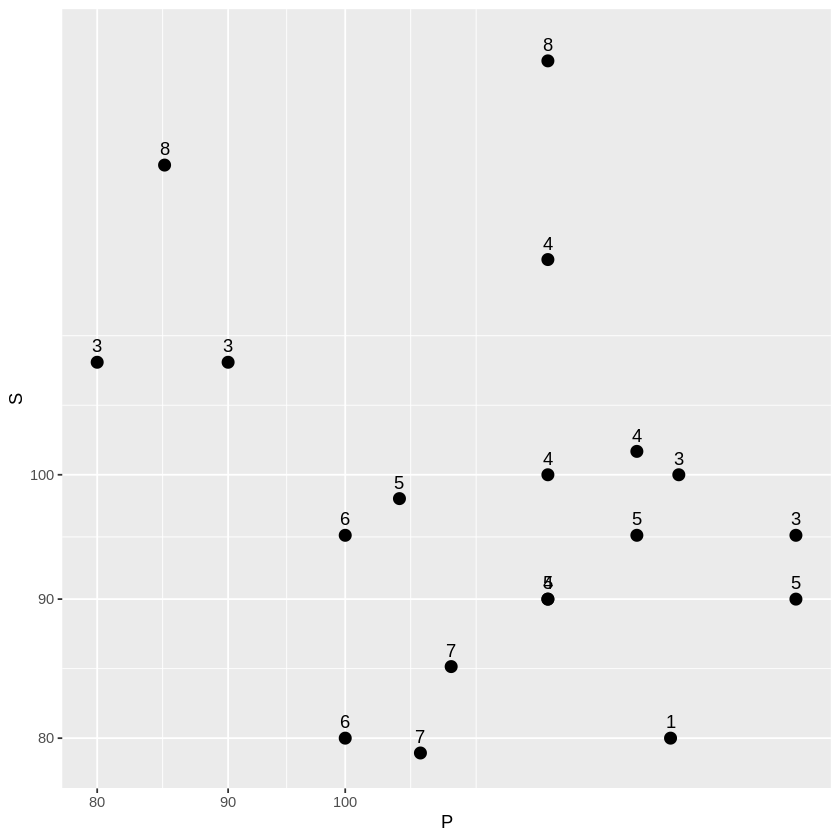

In [245]:
strong|> ggplot(aes(P,S, label=gen)) +
  geom_point(size = 3) +
  geom_text(nudge_y = 0.006) + #log scale에서 더 작아져야함 
  scale_x_continuous(trans = "log10") +
  scale_y_continuous(trans = "log10")

# scale_x_log10() + scale_y_log10() 도 가능

+geom_point()의 추가요소

aes(col=gen)은 sns 의 hue()와 비슷, show.legend=F로 범례 숨김

scale_color_discrete()는 범례 제목 수정함

In [295]:
plt=strong|> ggplot(aes(P,S, label=gen)) +
  geom_point(aes(col=gen),size = 3) +  
  geom_text(size=4, nudge_x =1.5)+
  xlab("Power") + 
  ylab("Speed") +
  ggtitle("(P,S) of dragon type pokemon") +
  geom_text(x=130,y=105,label="the 102 line!",size=8,color='pink') +
  geom_abline(intercept=102, slope=0,lty=5,color="red") + #선 추가
  scale_color_discrete(name = "Generation") # 범례 제목 수정

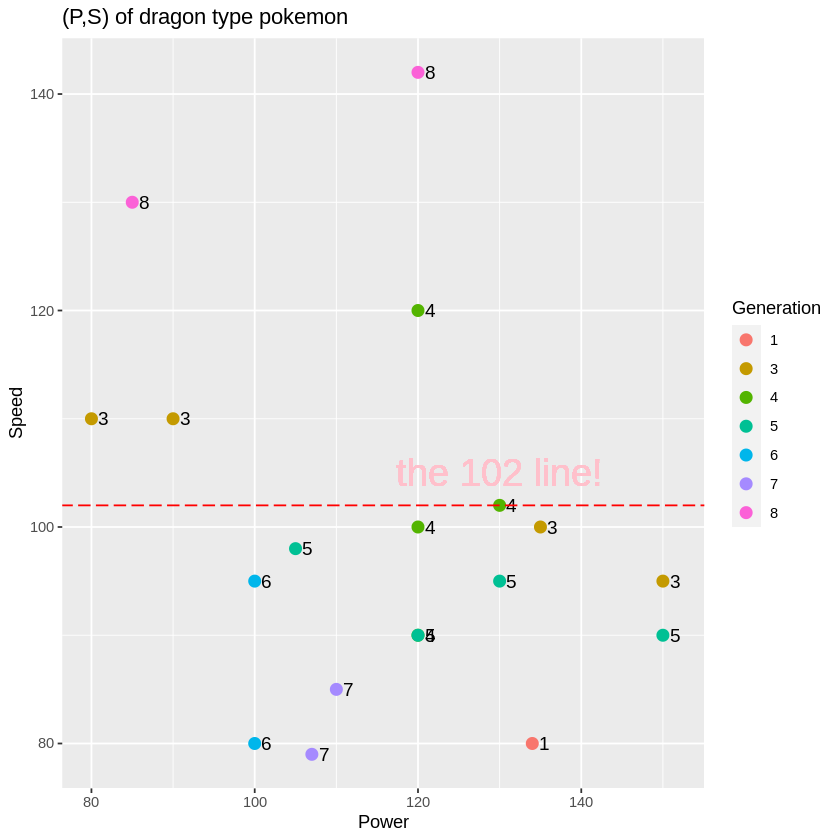

In [296]:
plt #1,2세대는 강한 드래곤 포켓몬이 거의 없습니다.

테마를 바꿀 시간입니다.

In [283]:
#install.packages('ggthemes') 처음 한번만

In [285]:
library(ggthemes)

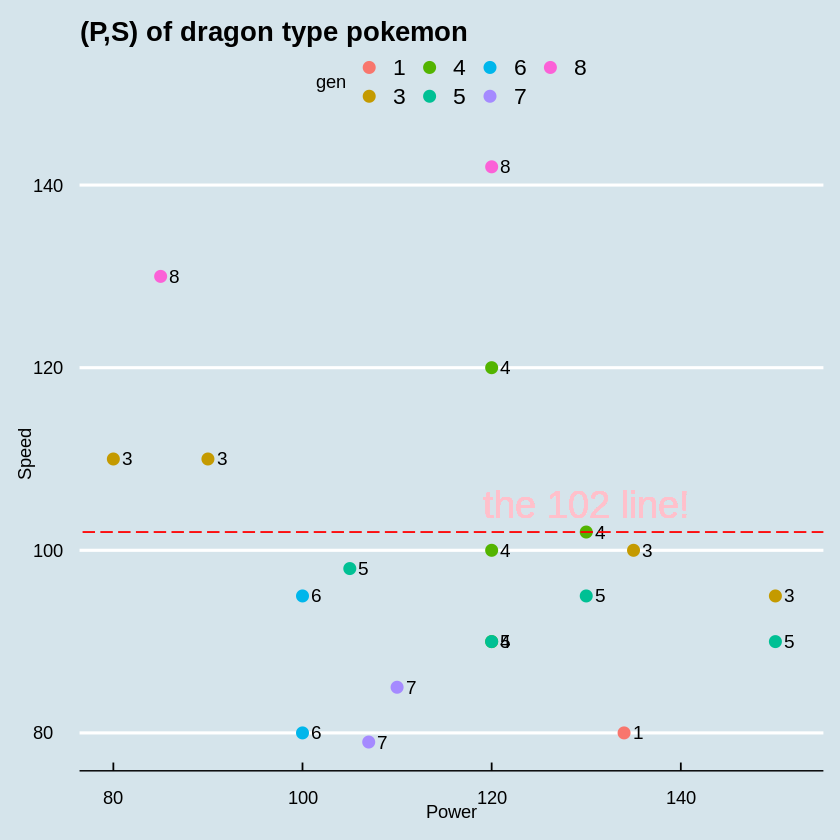

In [292]:
plt+theme_economist()

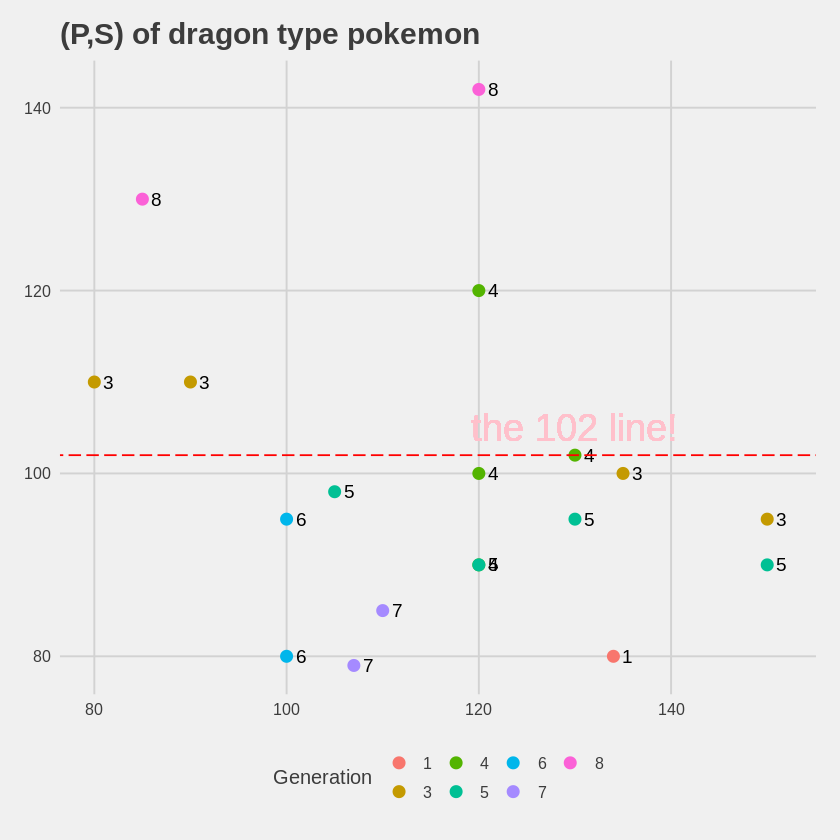

In [297]:
plt+ theme_fivethirtyeight()

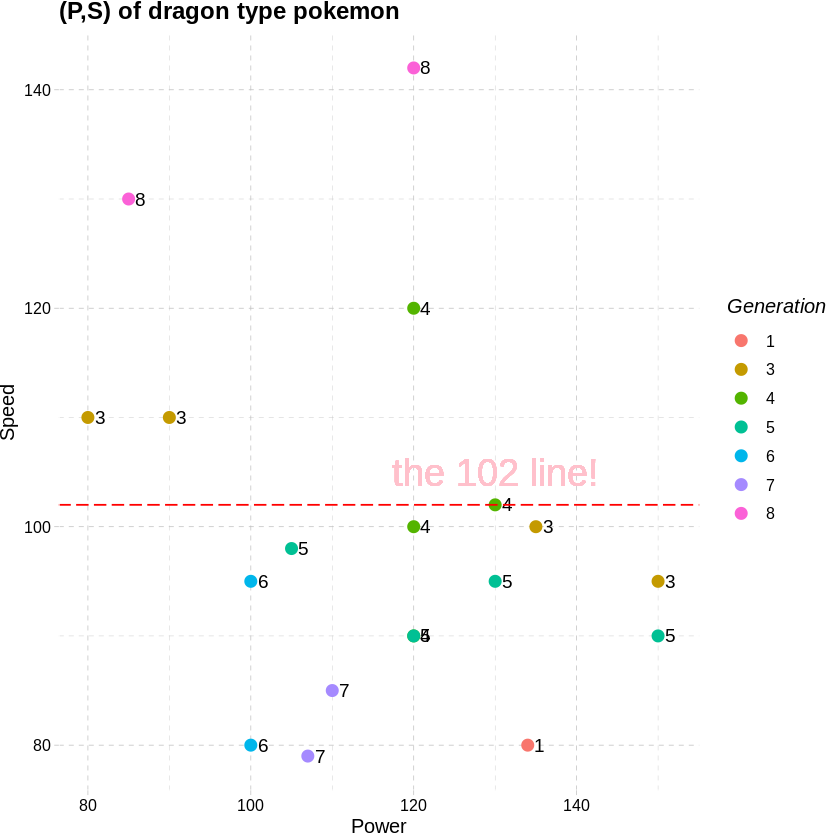

In [298]:
plt+theme_pander()

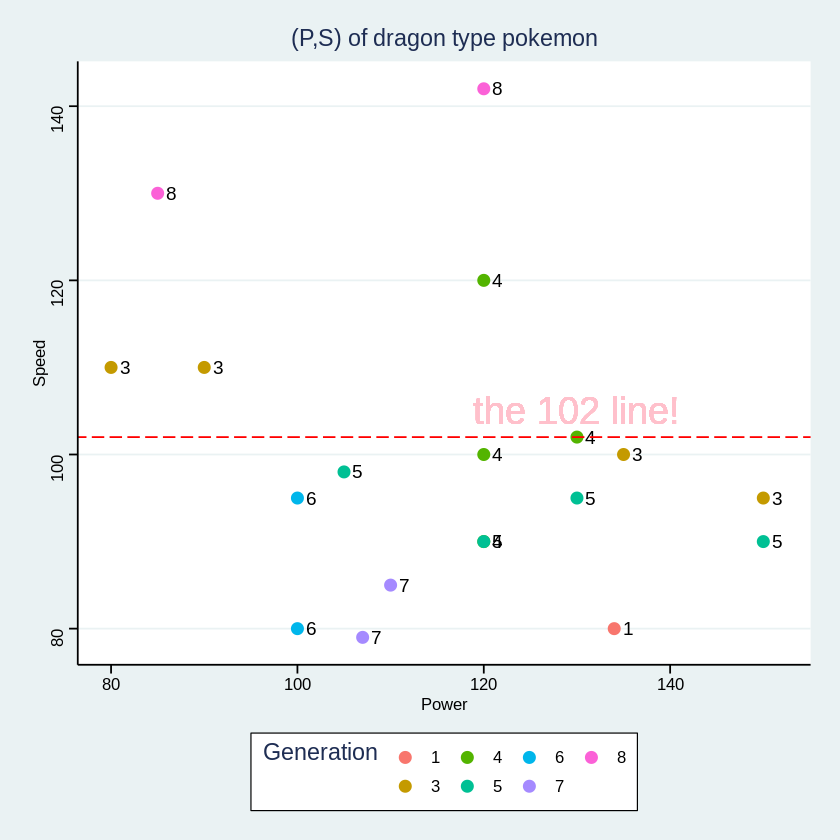

In [299]:
plt+theme_stata()

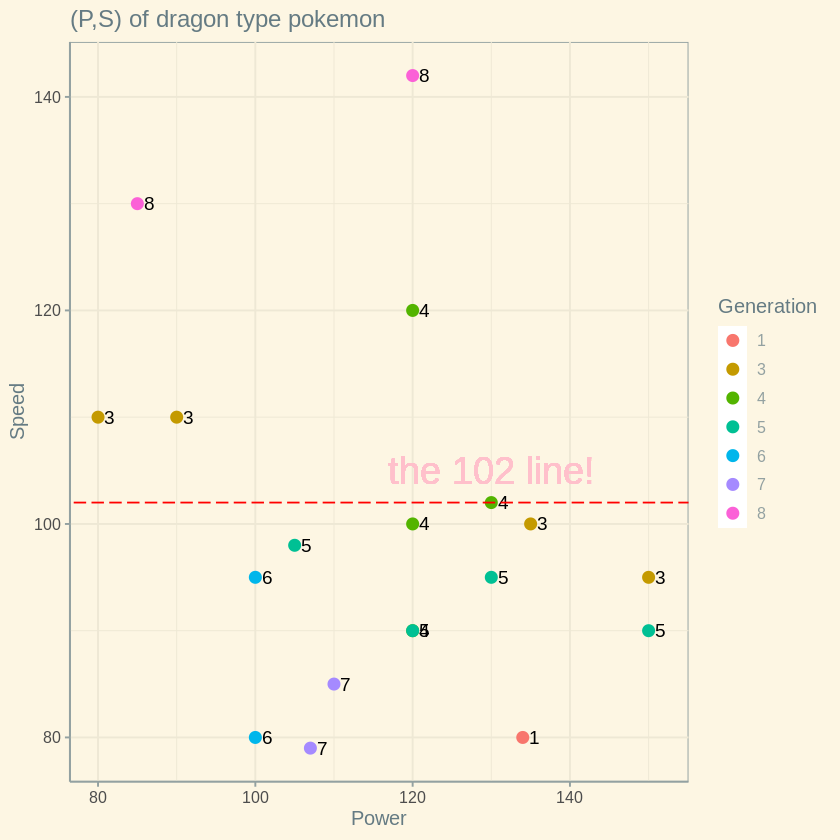

In [301]:
plt+theme_solarized()



---



테마를 더 알아보고 싶어지면 아래를 참고하면 됩니다.

위 예시는 배경색 등의 차이가 뚜렷한 걸 골랐지만 전체적으로 색조합보다는

격자스타일, 아웃라인 (+일부는 폰트) 등에 초점이 있습니다.

https://statisticsglobe.com/ggthemes-package-r


qplot

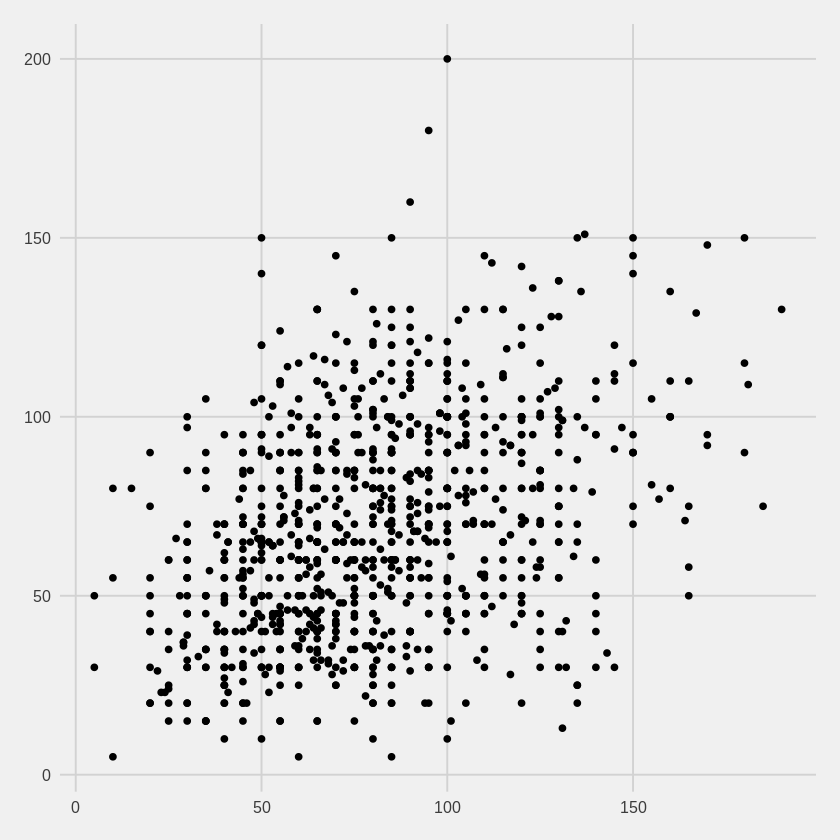

In [309]:
qplot(pkm$P,pkm$S)+theme_fivethirtyeight()

한 행에 두 그림 그리기

In [304]:
#install.packages('gridExtra') 최초 한번만 실행

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [305]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




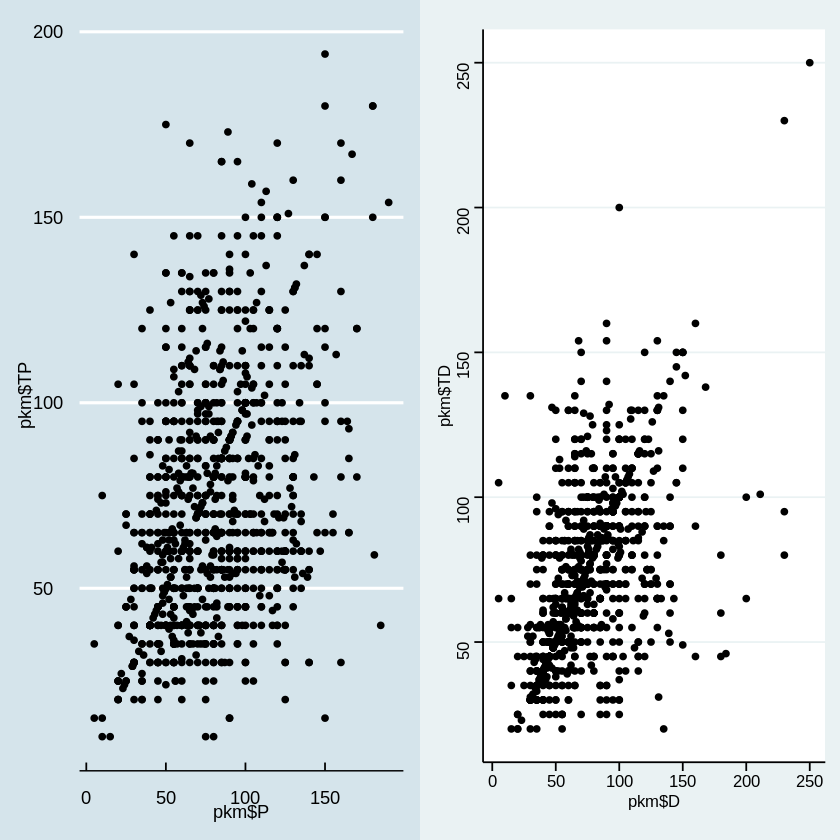

In [308]:
p1=qplot(pkm$P,pkm$TP)+theme_economist()
p2=qplot(pkm$D,pkm$TD)+theme_stata()
grid.arrange(p1, p2, ncol = 2)

간단한 해석)

p1에서 P(공격), TP(특수공격)은 두 상충되는 원인에 의해 비교적 랜덤한 분포를 보입니다:

1) 포켓몬의 모든 종족값은 진화 단계와 비례하는 경향이 있음 (+관계 원인)

2) 최종진화인 포켓몬은 P와 TP가 균형잡힌 경우보다,하나만 높은 경우가 더 많음 (-관계 원인)

반면 D와 TD의 선형 상관성이 더 큰 이유는, 때리는 포켓몬은 P 또는 TP에 올인할 선택권이 있지만 맞는 포켓몬은 P 기술을 맞을지 TP 기술을 맞을지 몰라서 그렇습니다.

#Ch 9: Visualizing data dstributions

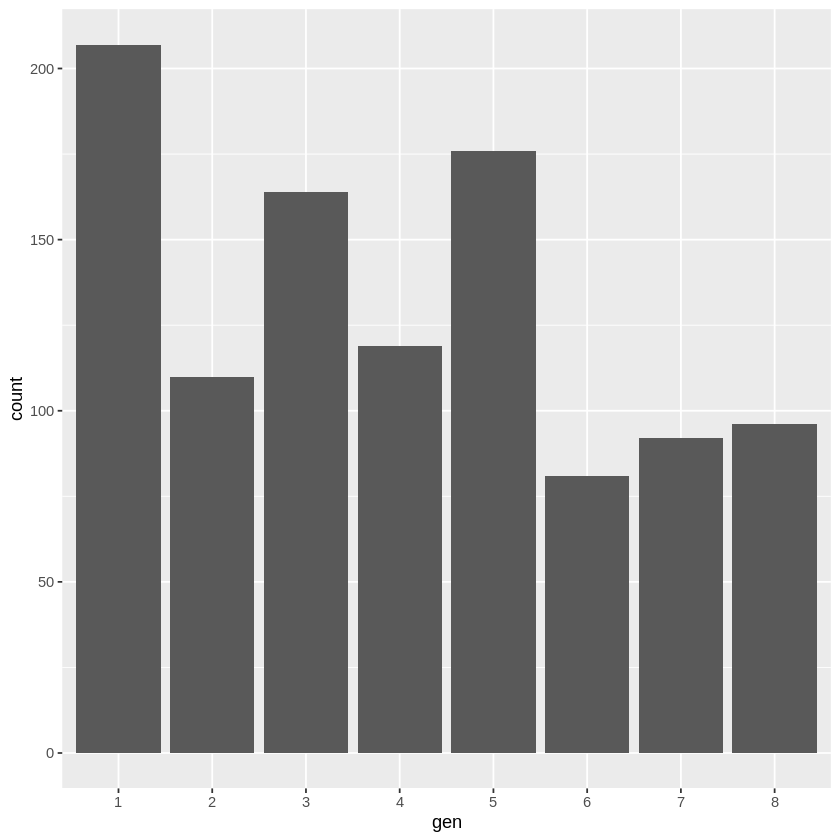

In [312]:
pkm|>ggplot(aes(gen))+geom_bar()

뒷 세대 포켓몬일수록 특이폼 등으로 재출현할 가능성이 낮아서 비교적 수가 적은 것 같습니다.

하지만 브다샤펄, 아르세우스로 두번 리메이크된 셈인 4세대는 그렇다쳐도

2세대는 왜인지 관심을 많이 못 받은 것 같습니다..

In [318]:
pkm |> 
  count(gen) |>  #이후 n으로 호출!
  mutate(prop = n/sum(n))

gen,n,prop
<chr>,<int>,<dbl>
1,207,0.19808612
2,110,0.10526316
3,164,0.15693780
4,119,0.11387560
5,176,0.16842105
6,81,0.07751196
7,92,0.08803828
8,96,0.09186603


count로 인해 행 수= 범례 수인 df가 만들어집니다.

아래처럼 bar plot이 특정값을 빈도로 해석하게 할 수도 있습니다.

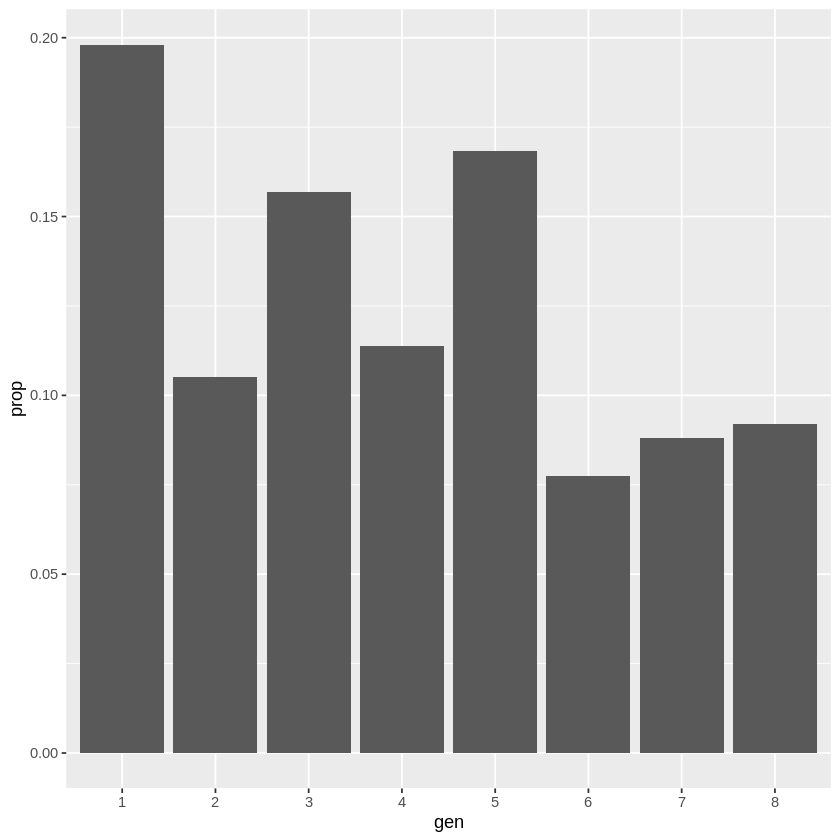

In [319]:
pkm |> 
  count(gen) |>  #이후 n으로 호출!
  mutate(prop = n/sum(n)) |>
  ggplot(aes(gen,prop))+geom_bar(stat="identity") #identity!

제가 좋아하는 포켓몬이 많은 물, 전기 타입을 살펴봅시다.

128개 행에 115마리 정보가 있습니다.

In [334]:
we=pkm|>filter(water==1|electric==1)|>pull(name)
length(unique(we))

[1] 115

geom_histogram 내 요소로 binwidth (계급 간격), fill(채움색), col(외곽선색)이 있습니다.

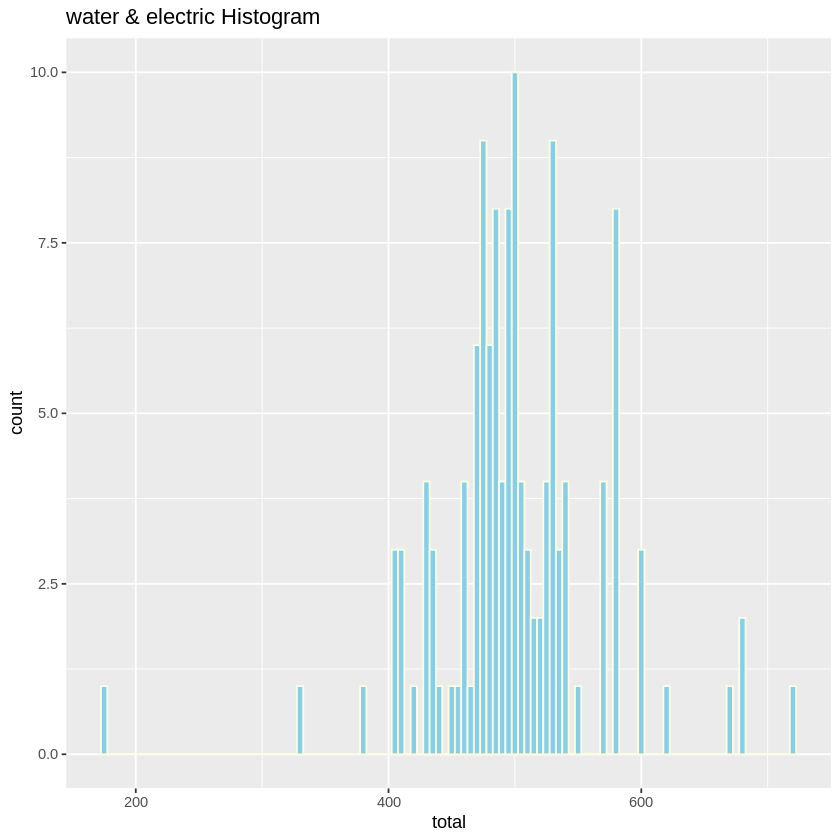

In [346]:
pkm |> 
  filter(water==1 | electric==1)|>
    ggplot(aes(total))+geom_histogram(binwidth=5, fill="skyblue",col="lightyellow")+
    xlab("total")+
    ggtitle("water & electric Histogram")

어렴풋한 smooth 분포를 얻고 싶다면 geom_histogram이 아닌 geom_density를 씁니다.

위 같은 경우, adjust(smoothness 조정)가 높을수록 정규분포와 유사한 방향으로 왜곡될 수 있습니다.

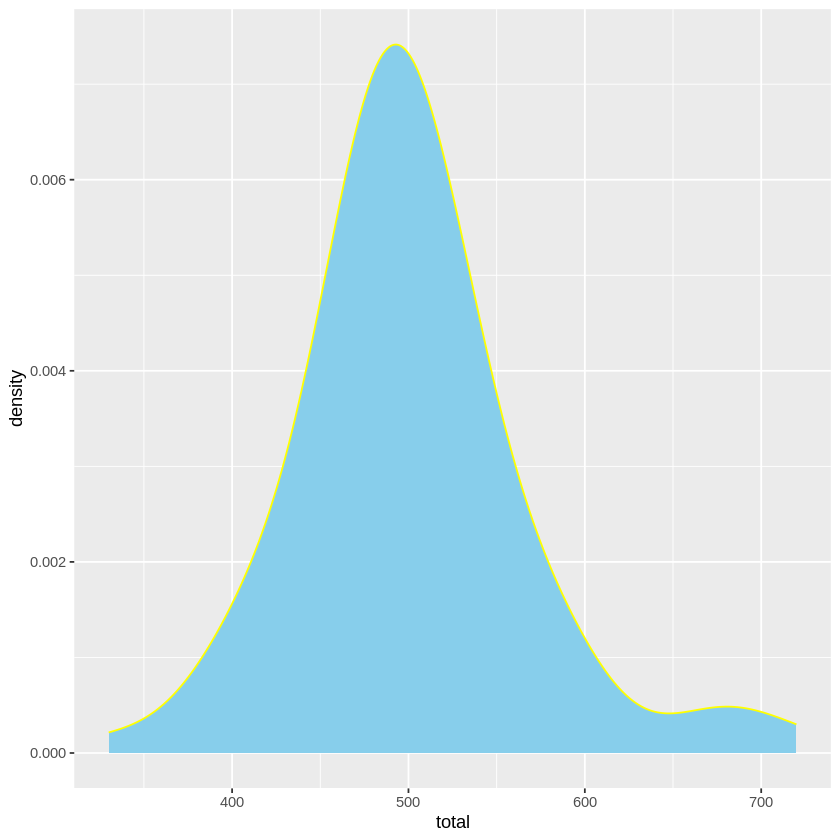

In [375]:
pkm |> 
  filter(gen %in% c("1","2","3","4","5"))|> # 이들 중에 해당한다면 T
  filter(water==1 | electric==1)|>
    ggplot(aes(total))+geom_density(fill="skyblue",col='yellow', adjust=2)

geom_boxplot은 입력변수가 하나인 geom_histogram과 달리 범주형 변수 x와 값 변수 y를 받습니다.

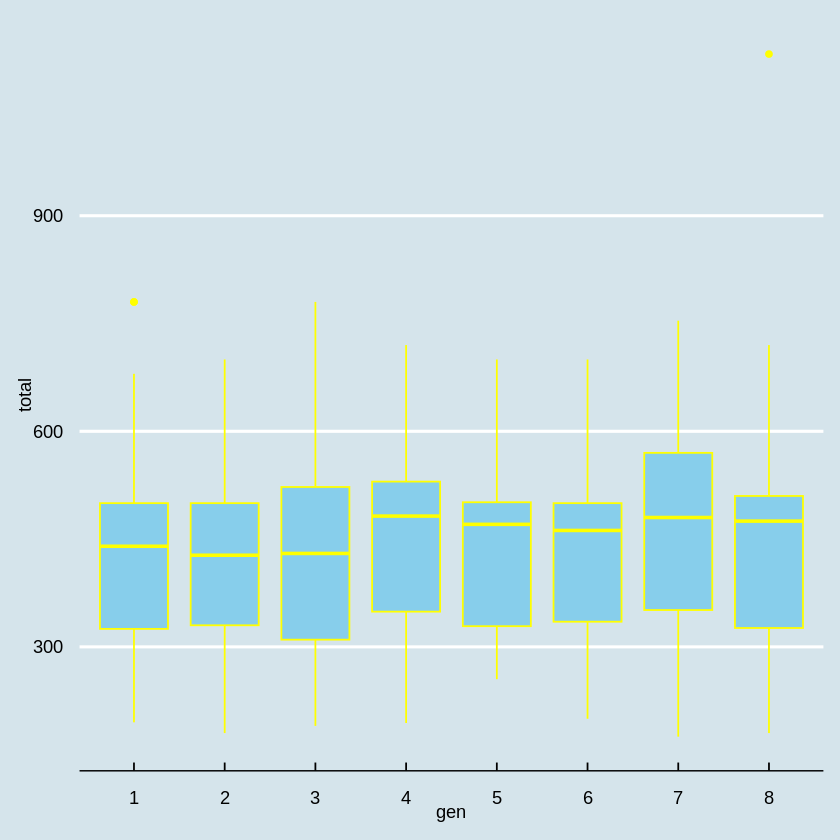

In [356]:
pkm |> ggplot(aes(gen, total))+geom_boxplot(fill="skyblue",col='yellow')+theme_economist()

1세대에 아웃라이어가 있습니다. 누군지 궁금합니다!

In [359]:
pkm|>filter(gen==1)|>arrange(desc(total))|>head(1)

#아하.. 메가뮤츠군요.

,n,id,name,H,P,D,TP,TD,S,tmi,⋯,fire,flying,dark,ice,psychic,electric,fairy,grass,gen,total
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,204,150mx,메가뮤츠X,106,190,100,154,100,130,,⋯,0,0,0,0,0,0,0,0,1,780


다시 qplot

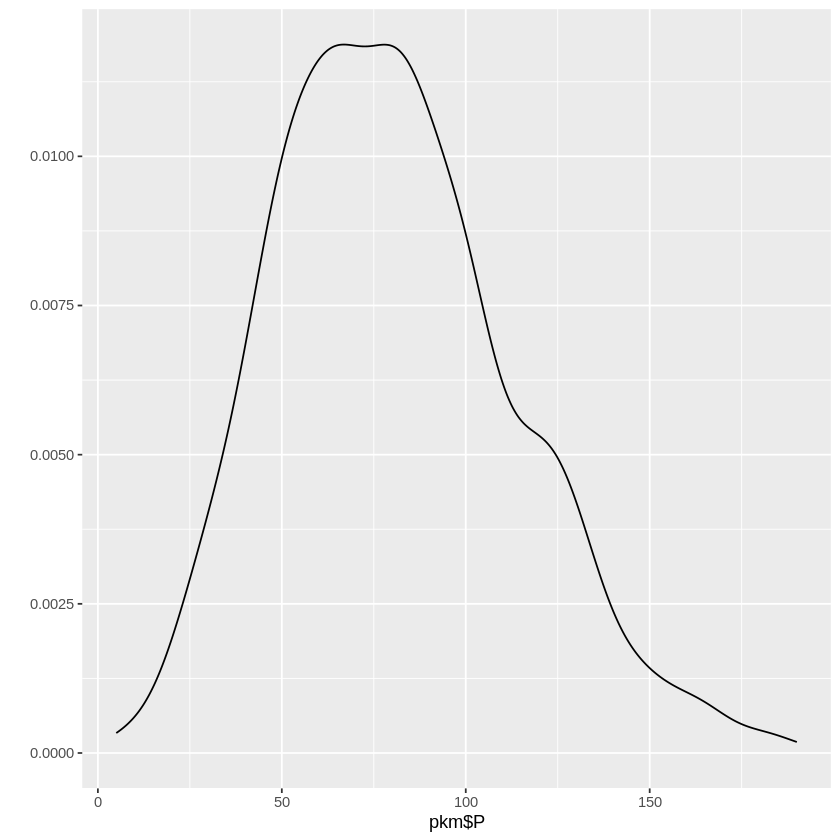

In [361]:
qplot(pkm$P, geom="density")

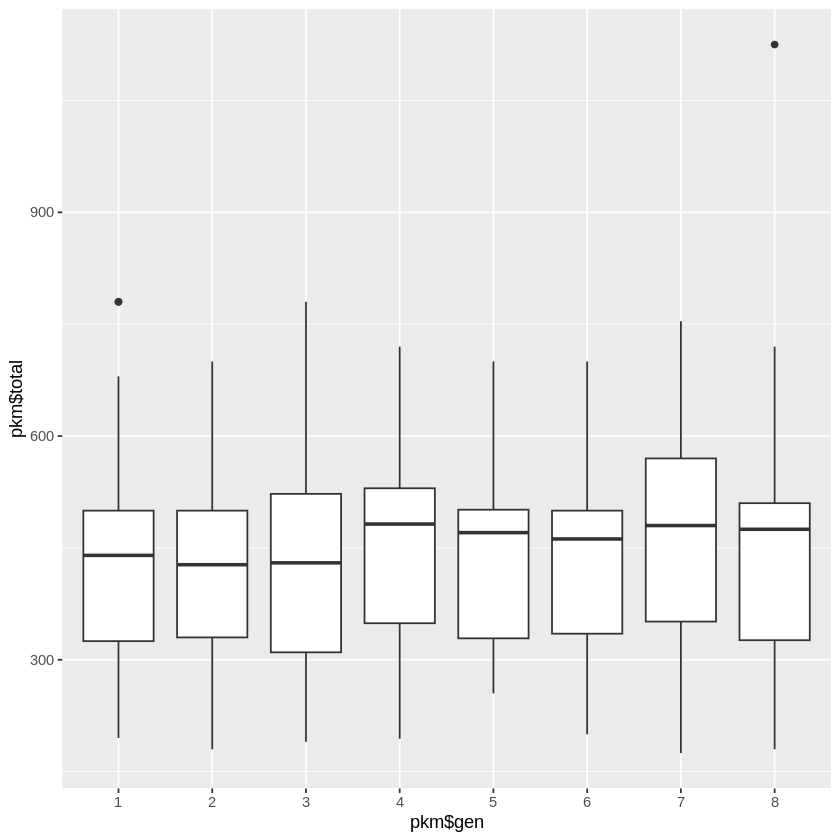

In [364]:
qplot(pkm$gen,pkm$total,geom='boxplot')

qplot에서 색 변경을 한다면, aes()안에서 factor로 처리되지 않도록 I()를 사용합니다.

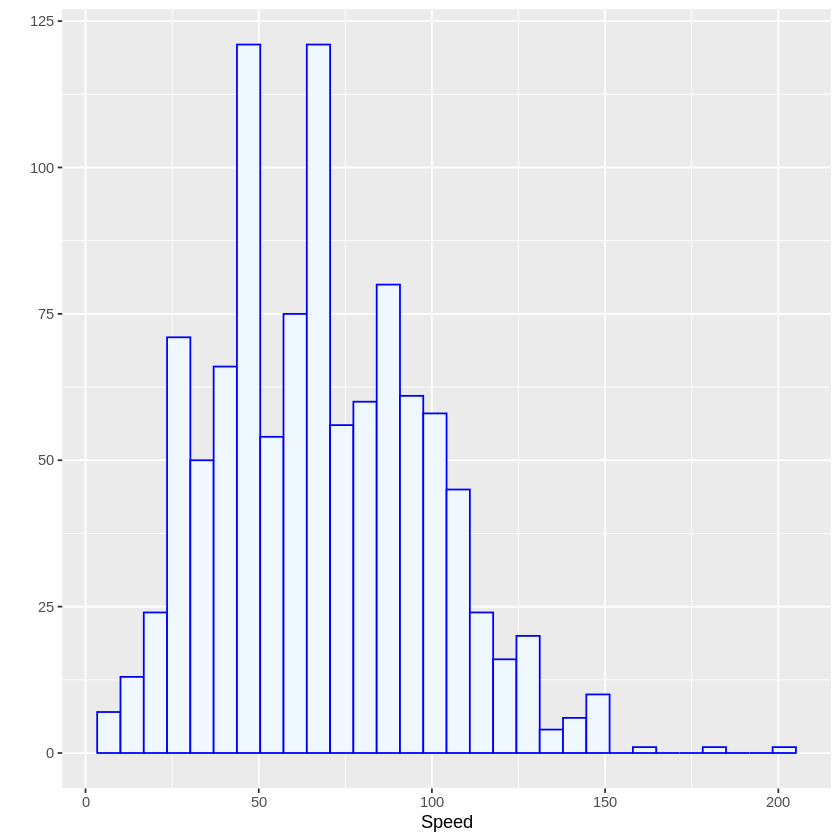

In [373]:
qplot(pkm$S, bins=30, fill=I("aliceblue"),color = I("blue"), xlab = "Speed")

#Ch 10: Data visualization in practice

facet

facet_grid(.~층화 변수) : . 쓰면 pipe 코드 결과를,

열변수 쓰면 전체 데이터 변수의 모든 unique 값에 대해 stratification

facet_wrap(~층화 변수): facet_Grid(.층화변수)를 격자로 나눠 보여줌.

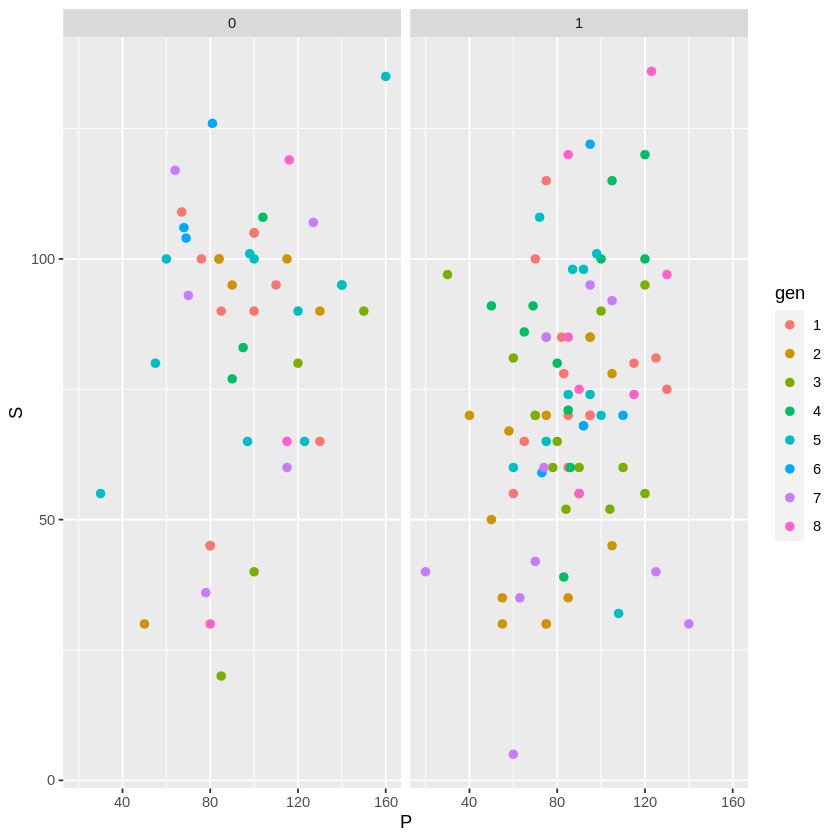

In [400]:
pkm|> filter(water==1|fire==1)|>
  ggplot(aes(P,S,col=gen)) +
  geom_point(size = 2) +
  facet_grid(.~water) #범주형 변수

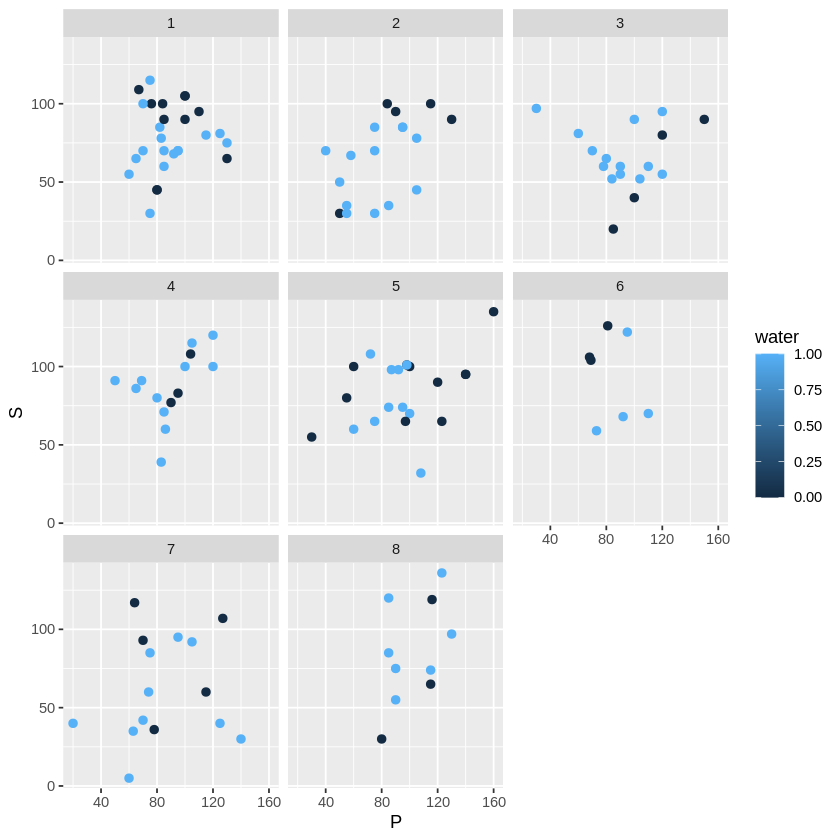

In [401]:
pkm|> filter(water==1|fire==1)|>
  ggplot(aes(P,S,col=water)) +
  geom_point(size = 2) +
  facet_wrap(~gen) #범주형 변수

facet과 density를 이용한 직관적인 비교

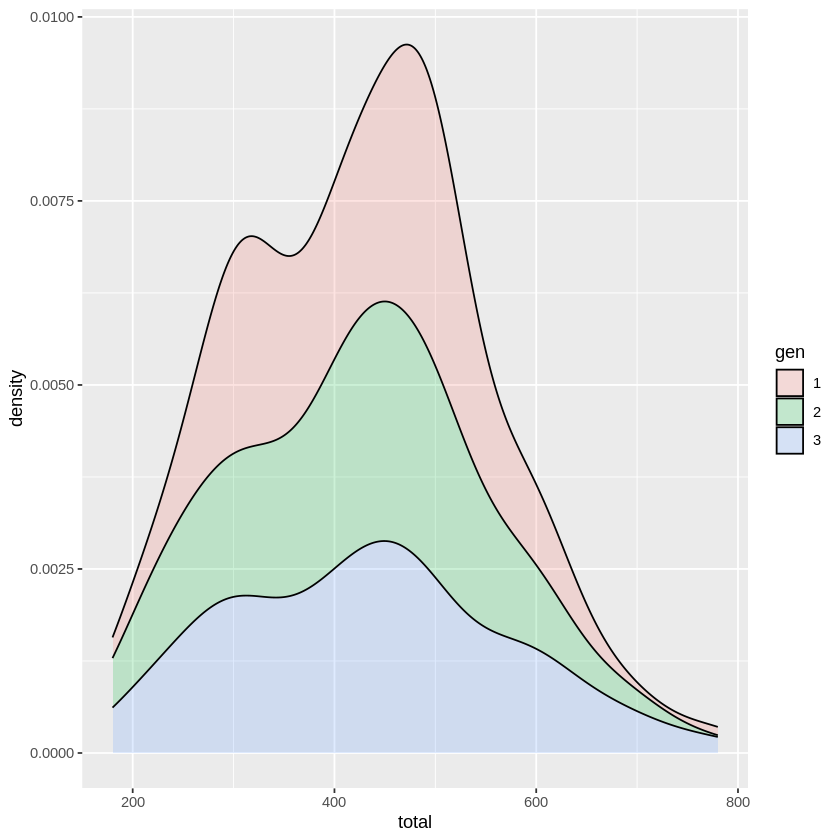

In [412]:
pkm |> 
  filter(gen %in% c('1','2','3')) |>
  ggplot(aes(total, fill = gen)) +
  geom_density(alpha = 0.2, position = "stack")

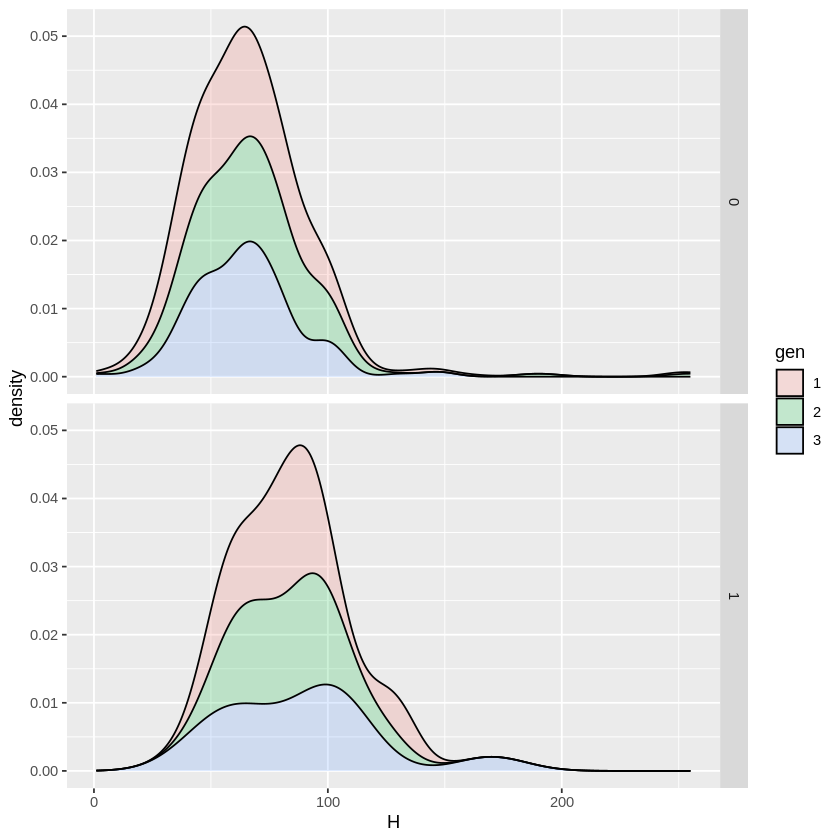

In [419]:
pkm |> 
  filter(gen %in% c('1','2','3')) |>
  ggplot(aes(H, fill = gen)) +
  geom_density(alpha = 0.2, position = "stack")+
  facet_grid(water~.) #.~gen이면 세로로 나뉨

이걸 보니 물 타입에 체력이 높은 포켓몬이 좀더 많은 것 같습니다. 아무래도 둔한 대신 지방층이 두꺼운(?) 이미지가 있긴 합니다.

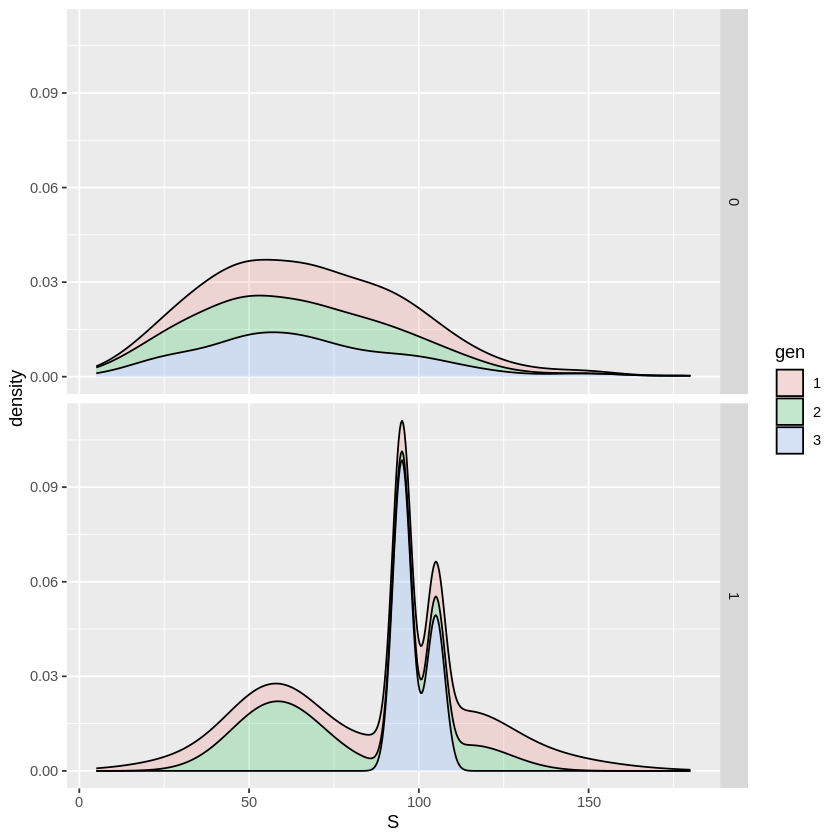

In [420]:
pkm |> 
  filter(gen %in% c('1','2','3')) |>
  ggplot(aes(S, fill = gen)) +
  geom_density(alpha = 0.2, position = "stack")+
  facet_grid(electric~.) #.~gen이면 세로로 나뉨

전기 포켓몬도 이미지대로 스피드가 빠른 포켓몬이 많은 편입니다.

#Ch 11: Visualization principles



* 인구처럼 변화가 곱셈적인 경우 로그 변환

  (이는 인구 증감을 고려할 때 매해의 증가 인구수가 아닌, 증가 비율을 고려함과 연관됨.

 현상이 유지되면 매해 동일 비율의 인구가 증가함)

* 그림의 일부를 생략하지 말것 (bar plot 왜곡 등)

* 점의 크기로 변수를 설명할 때, 점의 반지름이 아닌 넓이가 변수와 비례하도록 할 것 

  (반지름이 비례하면 반지름 제곱에 비례한 셈)

* 가능한 분포를 드러낼 것(직관적인 방향으로).

* psuedo 3D plot 사용은 신중하게. (많은 경우 불필요.)


* 색맹은 생각보다 흔하므로 눈에 잘 들어오는 색 조합을 사용할 것.

  이에 대해서는 다음 참조:

  http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette

* 점의 shape를 조정할 것

  이에 대해서는 다음 참조:

  http://rafalab.dfci.harvard.edu/dsbook/book_files/figure-html/available-shapes-1.png

RColorBrewer 관련:

In [435]:
#install.packages('RColorBrewer') 최초 한번만

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



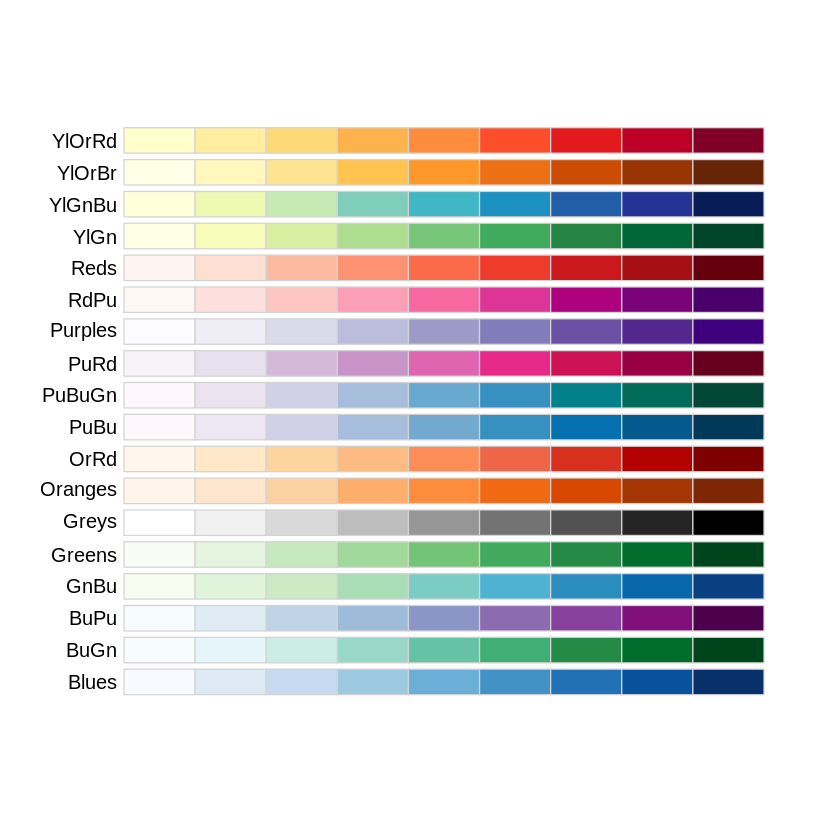

In [436]:
#한 방향으로 커질 때 효과적

library(RColorBrewer)
display.brewer.all(type="seq")

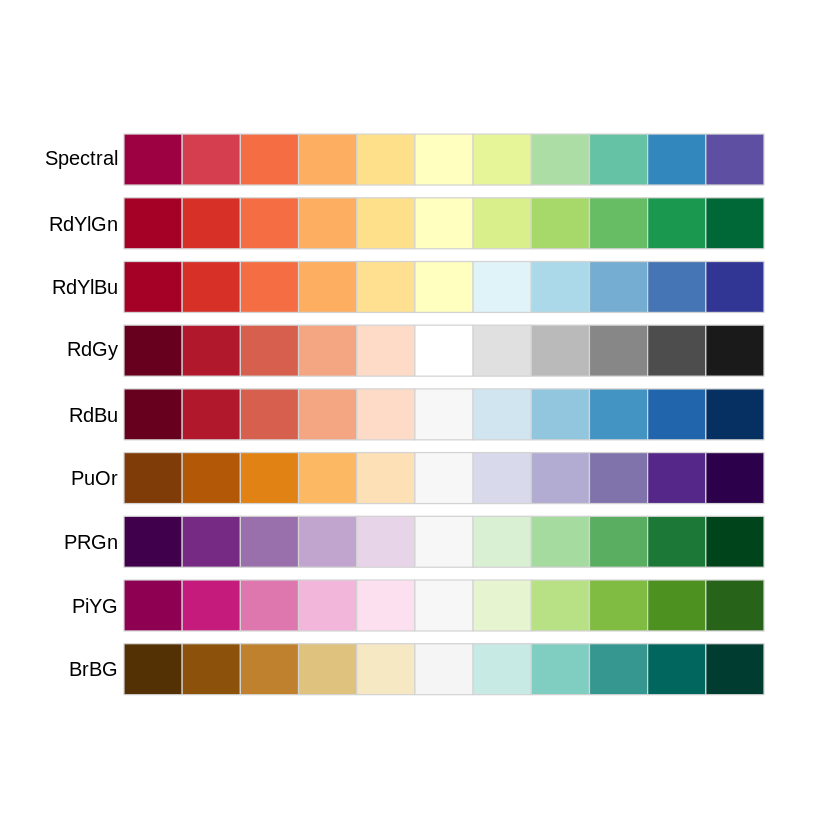

In [437]:
#중심으로부터 양방향으로 퍼지는 데이터에 효과적

display.brewer.all(type="div")

facet_grid 관련:

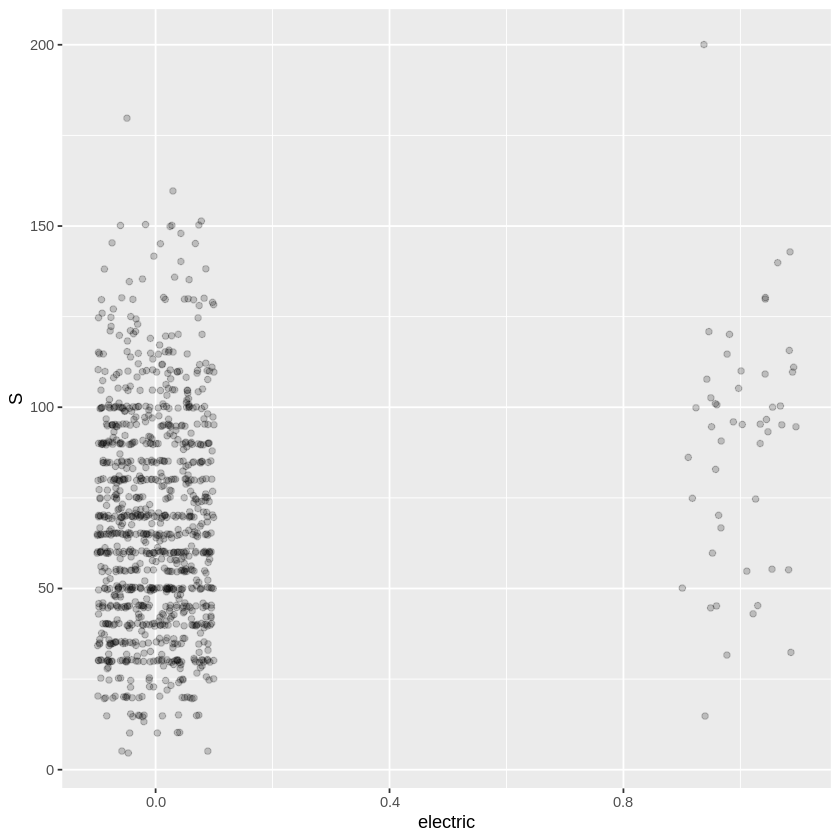

In [427]:
pkm |> 
  ggplot(aes(electric, S)) +
  geom_jitter(width = 0.1, alpha = 0.2) 

facet_grid를 사용해 비교하기 더 쉬운 편으로 위치시킬 것.

횡분포(?) 나 종분포 중 무엇이 더 중요한지 보면 됩니다.

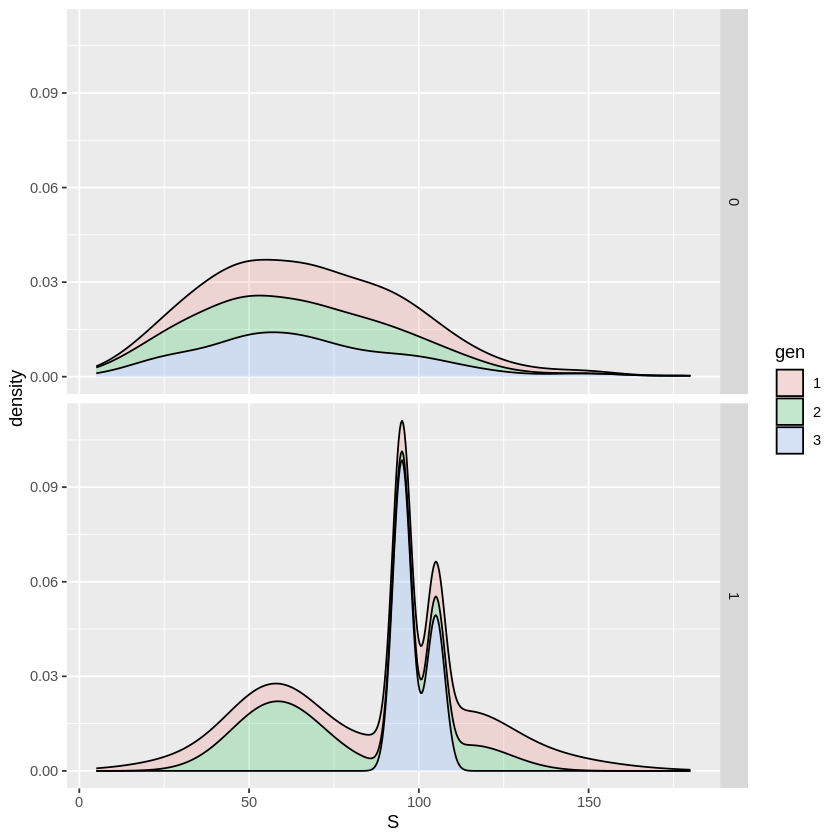

In [428]:
pkm |> 
  filter(gen %in% c('1','2','3')) |>
  ggplot(aes(S, fill = gen)) +
  geom_density(alpha = 0.2, position = "stack")+
  facet_grid(electric~.) #.~gen이면 세로로 나뉨

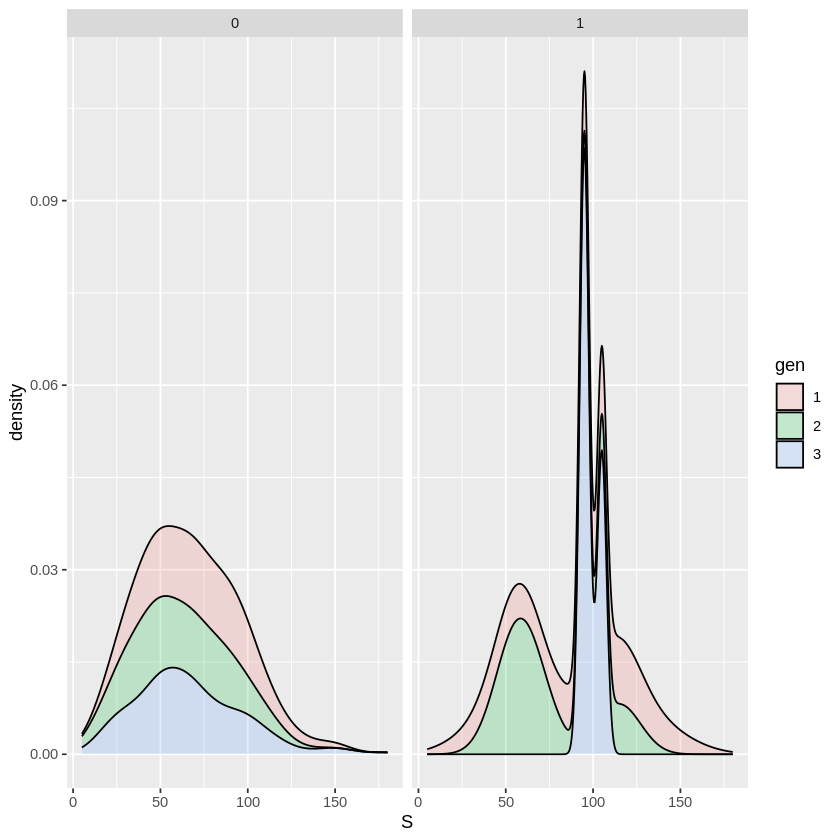

In [429]:
pkm |> 
  filter(gen %in% c('1','2','3')) |>
  ggplot(aes(S, fill = gen)) +
  geom_density(alpha = 0.2, position = "stack")+
  facet_grid(.~electric) #.~gen이면 세로로 나뉨

또다른 plot

slope charts: 직관적인 증감을 보여주어, scatter plot보다 변화 제시에 효과적입니다.

Bland-Altman chart는 생략하겠습니다.

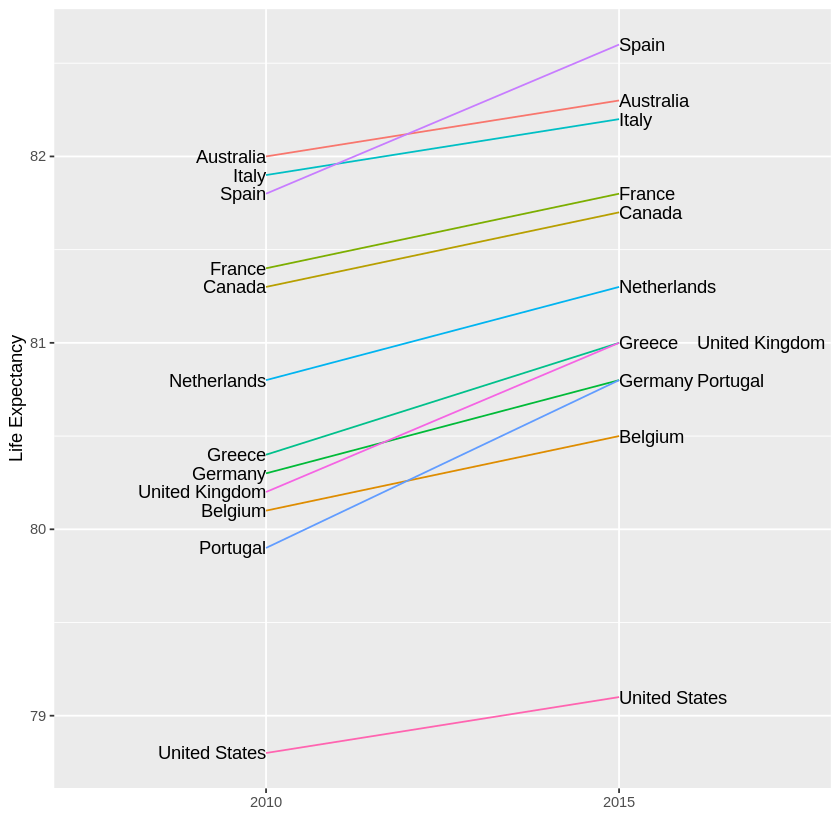

In [430]:
data(gapminder)

west <- c("Western Europe","Northern Europe","Southern Europe",
          "Northern America","Australia and New Zealand")

dat <- gapminder |> 
  filter(year%in% c(2010, 2015) & region %in% west & 
           !is.na(life_expectancy) & population > 10^7) 

dat |>
  mutate(location = ifelse(year == 2010, 1, 2), 
         location = ifelse(year == 2015 & 
                             country %in% c("United Kingdom", "Portugal"),
                           location+0.22, location),
         hjust = ifelse(year == 2010, 1, 0)) |>
  mutate(year = as.factor(year)) |>
  ggplot(aes(year, life_expectancy, group = country)) +
  geom_line(aes(color = country), show.legend = FALSE) +
  geom_text(aes(x = location, label = country, hjust = hjust), 
            show.legend = FALSE) +
  xlab("") + ylab("Life Expectancy")